In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('All.csv')
dataset.shape

(36707, 80)

In [3]:
dataset.loc[dataset["URL_Type_obf_Type"] =='Defacement', "URL_Type_obf_Type"] = 1
dataset.loc[dataset["URL_Type_obf_Type"] =='benign', "URL_Type_obf_Type"] = 0
dataset.loc[dataset["URL_Type_obf_Type"] =='phishing', "URL_Type_obf_Type"] = 2
dataset.loc[dataset["URL_Type_obf_Type"] =='malware', "URL_Type_obf_Type"] = 3
dataset.loc[dataset["URL_Type_obf_Type"] =='spam', "URL_Type_obf_Type"] = 4
dataset = pd.DataFrame(dataset)


dataset.dropna(inplace = True)
print(dataset.shape)

(18982, 80)


In [4]:
x = dataset.iloc[:, 0:79].values
x=pd.DataFrame(x)
y = dataset.iloc[:, 79].values
y=y.astype('int')


In [5]:
print('x shape:',x.shape)
x

x shape: (18982, 79)


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.0,4.0,4.0,6.250000,17.0,3.750000,4.0,4.0,2.0,0.0,...,1.0,1.0,0.0,-1.0,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000
1,22.0,4.0,10.0,6.250000,17.0,3.500000,4.0,19.0,10.0,0.0,...,1.0,9.0,8.0,7.0,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167
2,23.0,4.0,10.0,6.250000,17.0,3.500000,4.0,19.0,10.0,0.0,...,1.0,9.0,8.0,7.0,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
3,22.0,4.0,10.0,6.250000,17.0,3.500000,4.0,19.0,10.0,0.0,...,1.0,9.0,8.0,7.0,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506
4,23.0,4.0,10.0,6.250000,17.0,3.500000,4.0,19.0,10.0,0.0,...,1.0,9.0,8.0,7.0,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,29.0,4.0,14.0,5.750000,12.0,3.666667,4.0,20.0,24.0,3.0,...,11.0,3.0,2.0,7.0,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205
18978,0.0,4.0,13.0,3.750000,8.0,8.461538,4.0,24.0,23.0,0.0,...,2.0,16.0,15.0,-1.0,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000
18979,58.0,3.0,27.0,6.666666,16.0,3.375000,3.0,41.0,34.0,20.0,...,14.0,8.0,7.0,9.0,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245
18980,35.0,3.0,13.0,4.333334,9.0,3.600000,3.0,15.0,13.0,7.0,...,1.0,9.0,8.0,3.0,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772


In [6]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [7]:

pca = PCA(40)
print(pca)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
X = principalDf

print(X)
    

PCA(n_components=40)
               0           1          2          3          4          5   \
0     -136.574520  -38.501635   2.451011  -4.966203 -11.946473  -0.169309   
1      -24.262282   -4.056846 -20.321153   0.379380 -20.888712  13.897655   
2      -22.128913   -3.236712 -21.014430  -0.092381 -19.558100  13.633671   
3      -24.262285   -4.056845 -20.321036   0.379571 -20.888718  13.897591   
4      -22.128913   -3.236712 -21.014430  -0.092381 -19.558100  13.633671   
...           ...         ...        ...        ...        ...        ...   
18977   41.430535   61.027652   0.241592 -51.332609  -3.140831   9.903167   
18978   31.962945   77.764563 -29.459925  67.908437 -17.654737 -34.958876   
18979  262.027644  152.865234 -18.533206 -66.466424   7.202194  10.608194   
18980   29.414986   10.329794 -32.266994  -4.866811  21.101113   0.283944   
18981  218.228277  140.768416 -36.112397 -41.959959   6.670507  11.352067   

              6          7          8          9   ...

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred =np.round(y_pred,0)
score = accuracy_score(y_test, y_pred)
print(score)


0.8859626020542534


In [10]:
def pca_randomForest(n):
    pca = PCA(n)
    print(pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    X = principalDf
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    regressor = RandomForestRegressor(n_estimators=30, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred =np.round(y_pred,0)
    score = accuracy_score(y_test, y_pred)
    print(score)
    return score

In [11]:
pca_randomForest(10)

PCA(n_components=10)
0.8693705557018699


0.8693705557018699

In [12]:
s=[]
s.append(pca_randomForest(5))
s.append(pca_randomForest(10))
s.append(pca_randomForest(20))
s.append(pca_randomForest(40))
s.append(pca_randomForest(79))

PCA(n_components=5)
0.8359230971819858
PCA(n_components=10)
0.8680537266262839
PCA(n_components=20)
0.8770081643402686
PCA(n_components=40)
0.8870160653147221
PCA(n_components=79)
0.8883328943903082


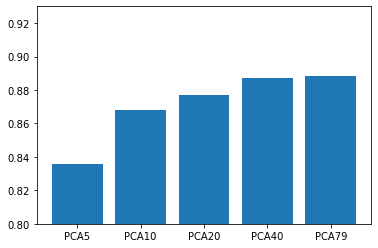

In [13]:
from matplotlib import pyplot as plt 
x =['PCA5','PCA10','PCA20','PCA40','PCA79']
y = [s[0],s[1],s[2],s[3],s[4]]
plt.ylim(0.8, 0.93)
plt.bar(x,y)
plt.show()